# Analysis of a plane frame

A frame consists of one horizontal and two vertical beams according to the figure.

<div>
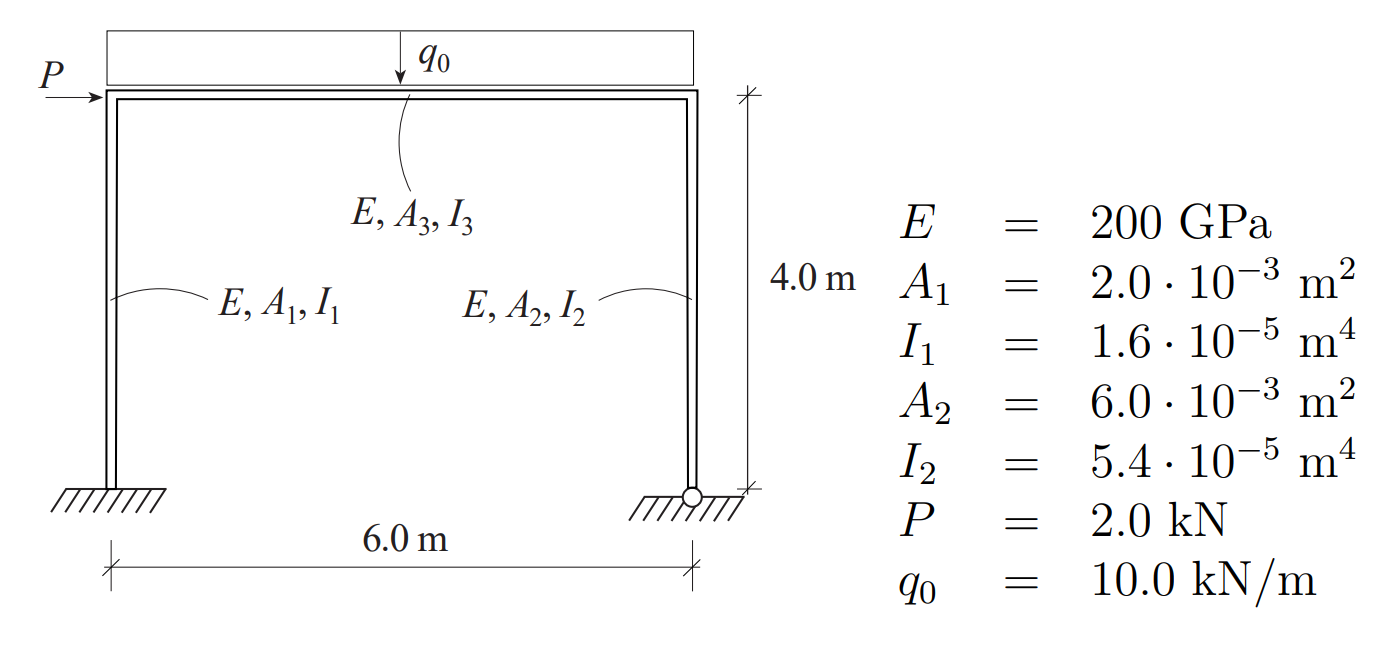
</div>

The corresponding finite element model consists of three beam elements and twelve
degrees of freedom.

<div>
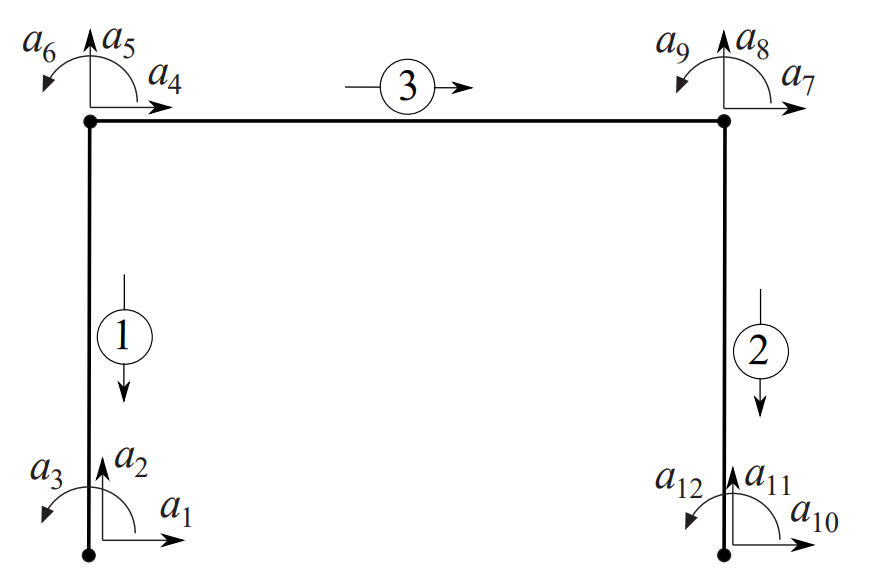
</div>

Install CALFEM (if required)

In [65]:
from importlib.util import find_spec

if find_spec("calfem.core") is None:
    !pip install calfem-python
else:
    print("CALFEM already installed.")

CALFEM already installed.


Import modules

In [66]:
import sys
import numpy as np
import calfem.core as cfc
import calfem.utils as cfu
import calfem.vis_mpl as cfv

Define topology

In [67]:
edof = np.array([
    [4, 5, 6, 1, 2, 3], 
    [7, 8, 9, 10, 11, 12], 
    [4, 5, 6, 7, 8, 9]
])

Setup stiffness matrix K and load vector f

In [68]:
K = np.array(np.zeros((12, 12)))
f = np.array(np.zeros((12, 1)))
f[3] = 20.0e3

Setup element stiffness and element load matrices

In [69]:
E = 200.0e9
A1 = 2.0e-3
A2 = 6.0e-3
I1 = 1.6e-5
I2 = 5.4e-5

ep1 = np.array([E, A1, I1])
ep3 = np.array([E, A2, I2])
ex1 = np.array([0, 0])
ex2 = np.array([6, 6])
ex3 = np.array([0, 6])
ey1 = np.array([4, 0])
ey2 = np.array([4, 0])
ey3 = np.array([4, 4])
eq1 = np.array([0, 0])
eq2 = np.array([0, 0])
eq3 = np.array([0, -10e3])

Ke1 = cfc.beam2e(ex1, ey1, ep1)
Ke2 = cfc.beam2e(ex2, ey2, ep1)
Ke3, fe3 = cfc.beam2e(ex3, ey3, ep3, eq3)

Assemble Ke into K

In [70]:
K = cfc.assem(edof[0, :], K, Ke1)
K = cfc.assem(edof[1, :], K, Ke2)
K, f = cfc.assem(edof[2, :], K, Ke3, f, fe3)

Solve the system of equations and compute reactions

In [71]:
bc = np.array([1, 2, 3, 10, 11])
a, r = cfc.solveq(K, f, bc)

cfu.disp_array(a, ["a (m)"])
cfu.disp_array(r, ["r (N)"])

a (m)
0.0000e+00
0.0000e+00
0.0000e+00
3.7225e-02
-2.1821e-04
-8.5898e-03
3.7185e-02
-3.8179e-04
3.9914e-03
0.0000e+00


r (N)
-1.2027e+04
2.1821e+04
3.0927e+04
-4.1473e-10
-3.6380e-12
0.0000e+00
-6.8394e-10
0.0000e+00
3.6380e-12
-7.9726e+03


Section forces

In [72]:
ed = cfc.extract_ed(edof, a)

es1, edi1, ec1 = cfc.beam2s(ex1, ey1, ep1, ed[0, :], eq1, nep=21)
es2, edi2, ec2 = cfc.beam2s(ex2, ey2, ep1, ed[1, :], eq2, nep=21)
es3, edi3, ec3 = cfc.beam2s(ex3, ey3, ep3, ed[2, :], eq3, nep=21)

cfu.disp_h2("es1")
cfu.disp_array(es1, ["N", "Vy", "Mz"])
cfu.disp_h2("edi1")
cfu.disp_array(edi1, ["u1", "v1"])
cfu.disp_h2("es2")
cfu.disp_array(es2, ["N", "Vy", "Mz"])
cfu.disp_h2("edi2")
cfu.disp_array(edi2, ["u1", "v1"])
cfu.disp_h2("es3")
cfu.disp_array(es3, ["N", "Vy", "Mz"])
cfu.disp_h2("edi3")
cfu.disp_array(edi3, ["u1", "v1"])


N,Vy,Mz
-2.1821e+04,-1.2027e+04,-1.7183e+04
-2.1821e+04,-1.2027e+04,-1.4777e+04
-2.1821e+04,-1.2027e+04,-1.2372e+04
-2.1821e+04,-1.2027e+04,-9.9665e+03
-2.1821e+04,-1.2027e+04,-7.5610e+03
-2.1821e+04,-1.2027e+04,-5.1555e+03
-2.1821e+04,-1.2027e+04,-2.7501e+03
-2.1821e+04,-1.2027e+04,-3.4459e+02
-2.1821e+04,-1.2027e+04,2.0609e+03
-2.1821e+04,-1.2027e+04,4.4664e+03


u1,v1
2.1821e-04,3.7225e-02
2.0730e-04,3.5405e-02
1.9639e-04,3.3400e-02
1.8548e-04,3.1240e-02
1.7457e-04,2.8956e-02
1.6366e-04,2.6577e-02
1.5275e-04,2.4134e-02
1.4184e-04,2.1656e-02
1.3093e-04,1.9174e-02
1.2002e-04,1.6718e-02


N,Vy,Mz
-3.8179e+04,-7.9726e+03,-3.1891e+04
-3.8179e+04,-7.9726e+03,-3.0296e+04
-3.8179e+04,-7.9726e+03,-2.8702e+04
-3.8179e+04,-7.9726e+03,-2.7107e+04
-3.8179e+04,-7.9726e+03,-2.5512e+04
-3.8179e+04,-7.9726e+03,-2.3918e+04
-3.8179e+04,-7.9726e+03,-2.2323e+04
-3.8179e+04,-7.9726e+03,-2.0729e+04
-3.8179e+04,-7.9726e+03,-1.9134e+04
-3.8179e+04,-7.9726e+03,-1.7540e+04


u1,v1
3.8179e-04,3.7185e-02
3.6270e-04,3.7788e-02
3.4361e-04,3.8011e-02
3.2452e-04,3.7876e-02
3.0543e-04,3.7402e-02
2.8634e-04,3.6609e-02
2.6725e-04,3.5517e-02
2.4816e-04,3.4146e-02
2.2907e-04,3.2516e-02
2.0998e-04,3.0647e-02


N,Vy,Mz
-7.9726e+03,-2.1821e+04,1.7183e+04
-7.9726e+03,-1.8821e+04,2.3279e+04
-7.9726e+03,-1.5821e+04,2.8476e+04
-7.9726e+03,-1.2821e+04,3.2772e+04
-7.9726e+03,-9.8211e+03,3.6168e+04
-7.9726e+03,-6.8211e+03,3.8665e+04
-7.9726e+03,-3.8211e+03,4.0261e+04
-7.9726e+03,-8.2109e+02,4.0957e+04
-7.9726e+03,2.1789e+03,4.0754e+04
-7.9726e+03,5.1789e+03,3.9650e+04


u1,v1
3.7225e-02,-2.1821e-04
3.7223e-02,-2.7148e-03
3.7221e-02,-5.0180e-03
3.7219e-02,-7.0845e-03
3.7217e-02,-8.8785e-03
3.7215e-02,-1.0372e-02
3.7213e-02,-1.1543e-02
3.7211e-02,-1.2380e-02
3.7209e-02,-1.2876e-02
3.7207e-02,-1.3034e-02


Draw deformed frame

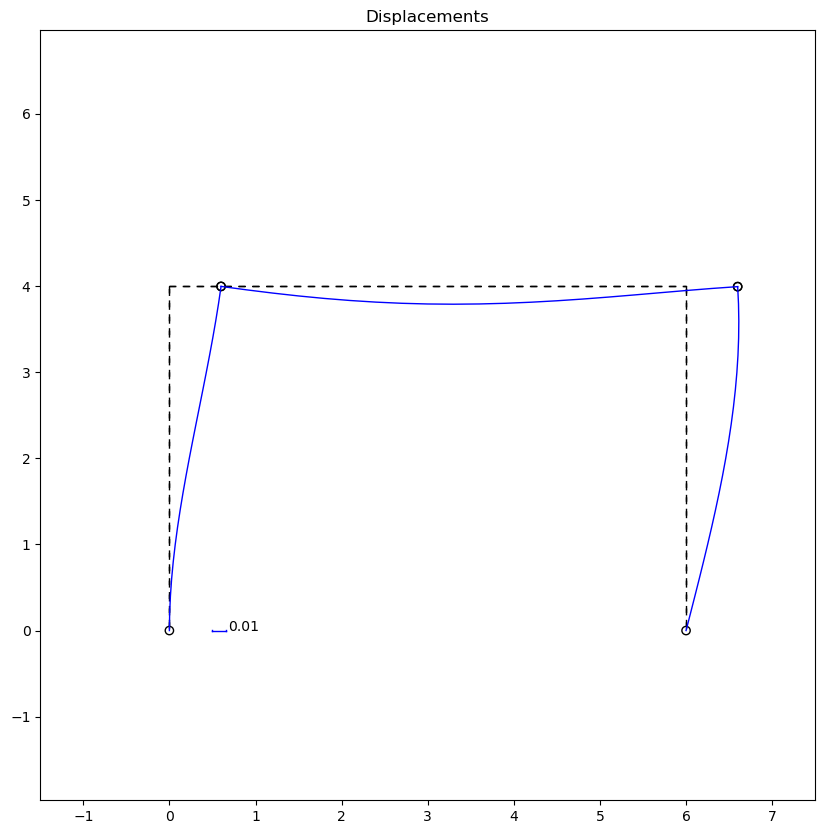

In [73]:
plotpar = [2, 1, 0]
sfac = cfv.scalfact2(ex3, ey3, edi3, 0.1)
cfu.disp(f"sfac={sfac}")

cfv.figure(1, fig_size=(10, 10))
cfv.eldraw2(ex1, ey1, plotpar)
cfv.eldraw2(ex2, ey2, plotpar)
cfv.eldraw2(ex3, ey3, plotpar)

plotpar = [1, 2, 1]
cfv.dispbeam2(ex1, ey1, edi1, plotpar, sfac)
cfv.dispbeam2(ex2, ey2, edi2, plotpar, sfac)
cfv.dispbeam2(ex3, ey3, edi3, plotpar, sfac)
cfv.axis([-1.5, 7.5, -0.5, 5.5])
plotpar1 = 2
cfv.scalgraph2(sfac, [1e-2, 0.5, 0], plotpar1)
cfv.title("Displacements")

Draw Normal forces diagram

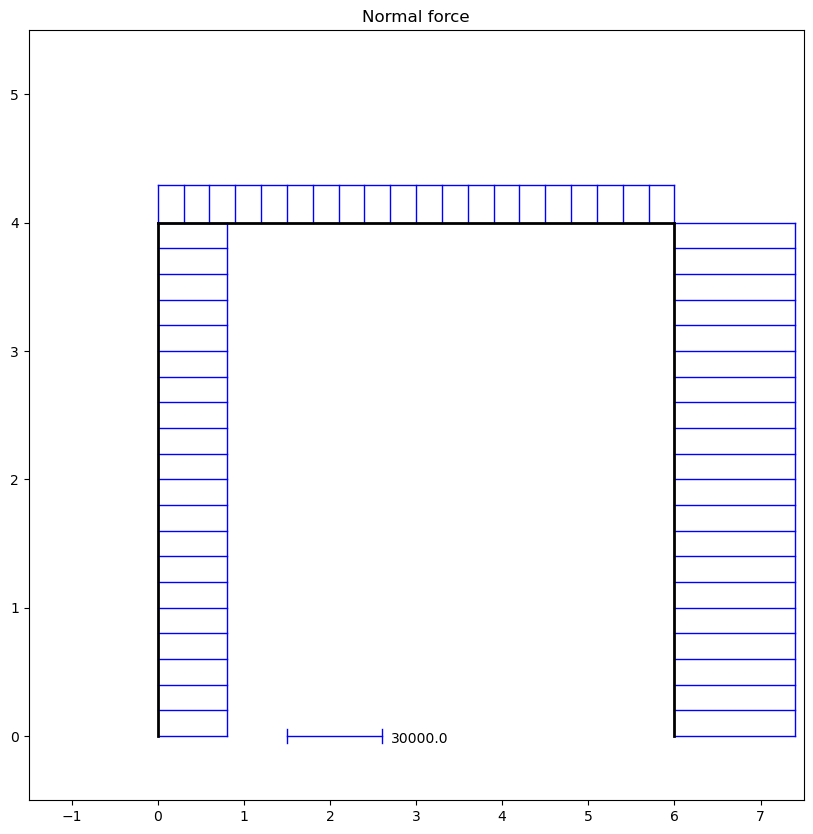

In [74]:
plotpar = [2, 1]
sfac = cfv.scalfact2(ex1, ey1, es1[:, 0], 0.2)
cfv.figure(2, fig_size=(10, 10))
cfv.secforce2(ex1, ey1, es1[:, 0], plotpar, sfac)
cfv.secforce2(ex2, ey2, es2[:, 0], plotpar, sfac)
cfv.secforce2(ex3, ey3, es3[:, 0], plotpar, sfac)
cfv.axis([-1.5, 7.5, -0.5, 5.5])
cfv.scalgraph2(sfac, [3e4, 1.5, 0], plotpar1)
cfv.title("Normal force")

Draw shear force diagram

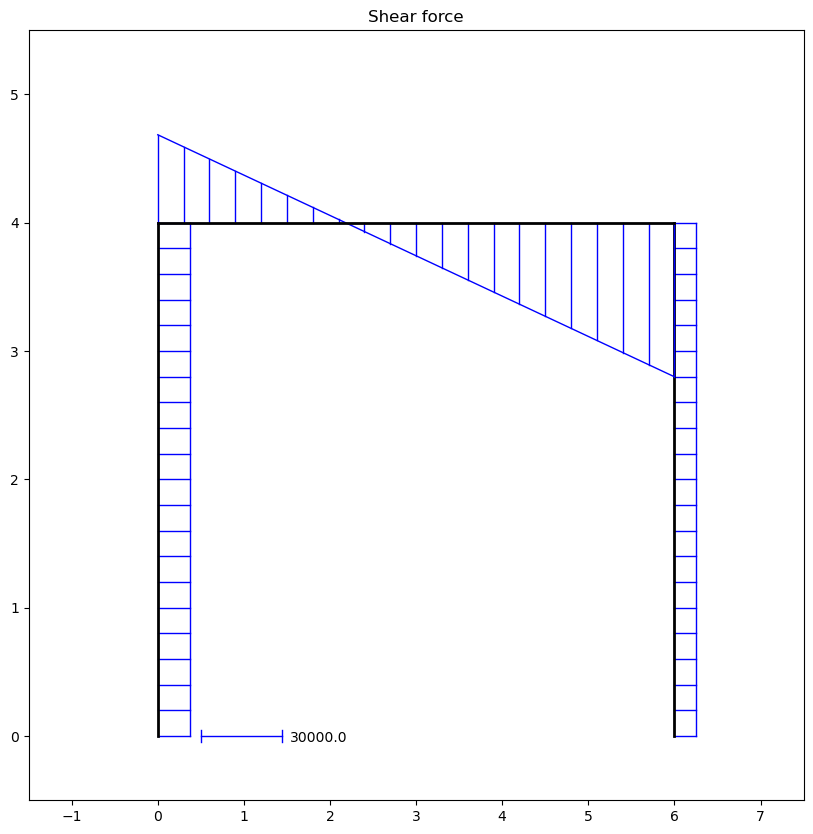

In [75]:
plotpar = [2, 1]
sfac = cfv.scalfact2(ex3, ey3, es3[:, 1], 0.2)
cfv.figure(3, fig_size=(10, 10))
cfv.secforce2(ex1, ey1, es1[:, 1], plotpar, sfac)
cfv.secforce2(ex2, ey2, es2[:, 1], plotpar, sfac)
cfv.secforce2(ex3, ey3, es3[:, 1], plotpar, sfac)
cfv.axis([-1.5, 7.5, -0.5, 5.5])
cfv.scalgraph2(sfac, [3e4, 0.5, 0], plotpar1)
cfv.title("Shear force")

Draw shear force diagram

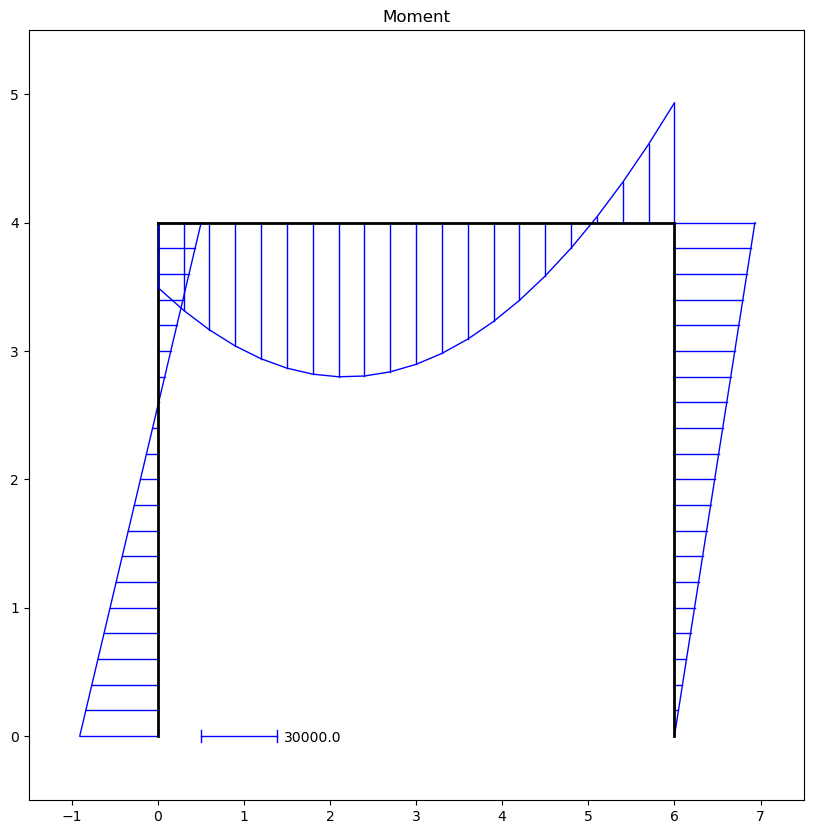

In [76]:
plotpar = [2, 1]
sfac = cfv.scalfact2(ex3, ey3, es3[:, 2], 0.2)
cfu.disp(f"sfac={sfac}")

cfv.figure(4, fig_size=(10, 10))
cfv.secforce2(ex1, ey1, es1[:, 2], plotpar, sfac)
cfv.secforce2(ex2, ey2, es2[:, 2], plotpar, sfac)
cfv.secforce2(ex3, ey3, es3[:, 2], plotpar, sfac)
cfv.axis([-1.5, 7.5, -0.5, 5.5])
cfv.scalgraph2(sfac, [3e4, 0.5, 0], plotpar1)
cfv.title("Moment")